In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Optional for better visuals
sns.set(style="whitegrid")

# Load the dataset 
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Show the first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
})
missing_report[missing_report['Missing %'] > 5]


,Missing Count,Missing %
Comments,525600,100.0


Outlier Detection and Basic Cleaning

In [6]:
from scipy.stats import zscore
import numpy as np

columns_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Z-score calculation
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)

# Flagging outliers
df["outlier_flag"] = outliers.any(axis=1)

# Impute or drop
df_cleaned = df.copy()

for col in columns_to_check:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Drop or mark rows if needed
 #df_cleaned = df_cleaned[~df_cleaned["outlier_flag"]]


Export Clean Dataset

In [7]:
df_cleaned.to_csv("../data/sierraleone_clean.csv", index=False)


Time Series Analysis

<Figure size 1200x600 with 0 Axes>

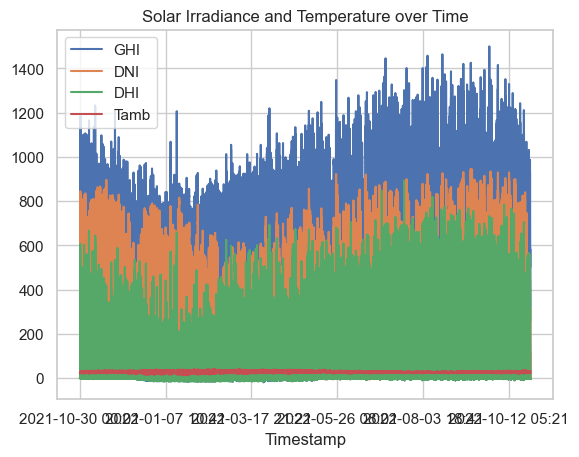

In [8]:
import matplotlib.pyplot as plt

#df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Adjust if needed

plt.figure(figsize=(12, 6))
df.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot()
plt.title("Solar Irradiance and Temperature over Time")
plt.show()


Cleaning Impact on ModA & ModB

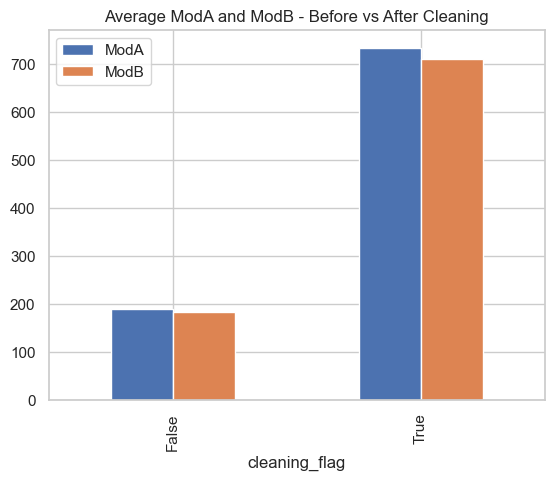

In [9]:
df["cleaning_flag"] = df["outlier_flag"]  # You can also define it differently

df.groupby("cleaning_flag")[["ModA", "ModB"]].mean().plot(kind="bar")
plt.title("Average ModA and ModB - Before vs After Cleaning")
plt.show()



Corrolation Heatmap

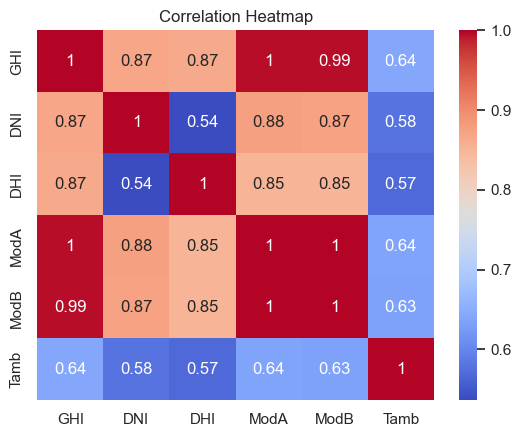

In [10]:
import seaborn as sns

corr_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "Tamb"]
corr = df_cleaned[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Wind & Distribution Analysis Histogram

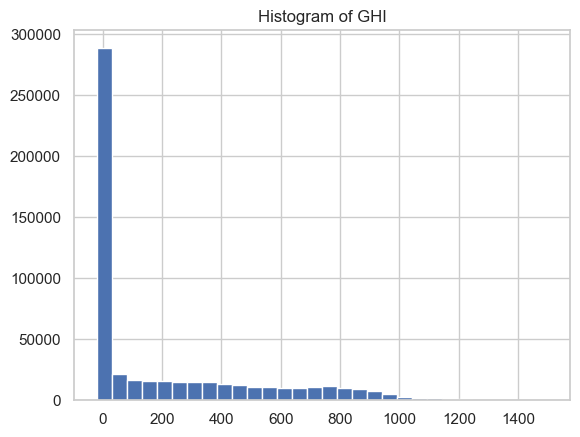

In [11]:
df_cleaned["GHI"].hist(bins=30)
plt.title("Histogram of GHI")
plt.show()


Temperature & Humidity

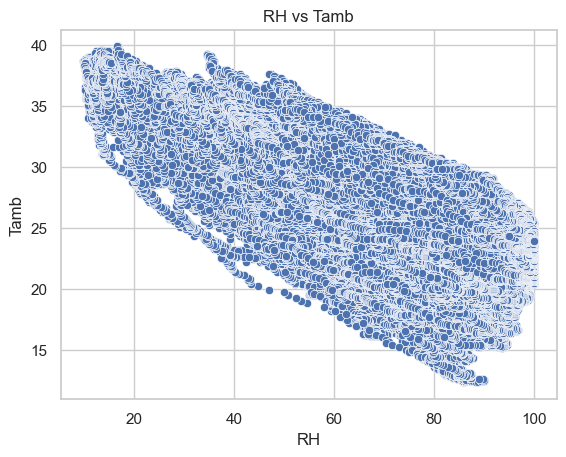

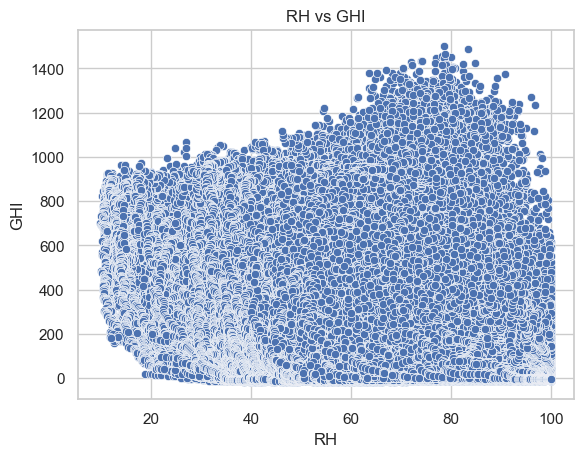

In [12]:
sns.scatterplot(x="RH", y="Tamb", data=df_cleaned)
plt.title("RH vs Tamb")
plt.show()

sns.scatterplot(x="RH", y="GHI", data=df_cleaned)
plt.title("RH vs GHI")
plt.show()


Bubble Chart: GHI vs Tamb with RP/BP

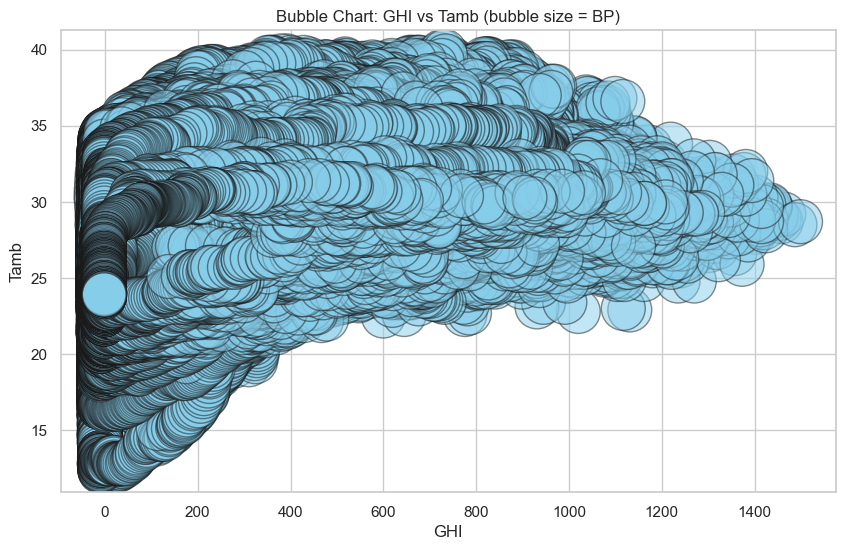

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["GHI"], df_cleaned["Tamb"], 
            s=df_cleaned["BP"], alpha=0.5, c='skyblue', edgecolors='k')

plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("Bubble Chart: GHI vs Tamb (bubble size = BP)")
plt.grid(True)
plt.show()
